### Clusters

In [ ]:
# Instale se ainda não tiver
!pip install pyAudioAnalysis pydub matplotlib --quiet


In [2]:
from pydub import AudioSegment
from pathlib import Path

# Caminho da pasta com subpastas por BPM
INPUT_DIR = Path(r"D:\Fausto Stangler\Documentos\Python\BFX\music first")  # 🔁 Substitua aqui
OUTPUT_WAV = Path("./all_wav")
OUTPUT_WAV.mkdir(exist_ok=True)

def convert_mp3_to_wav(mp3_path, wav_path):
    audio = AudioSegment.from_file(mp3_path)
    audio = audio.set_channels(1).set_frame_rate(16000)
    audio.export(wav_path, format="wav")

for mp3_file in INPUT_DIR.rglob("*.mp3"):
    safe_name = mp3_file.stem.replace(" ", "_")[:128]
    out_path = OUTPUT_WAV / f"{safe_name}.wav"
    if not out_path.exists():
        convert_mp3_to_wav(mp3_file, out_path)

print(f"Total convertidos: {len(list(OUTPUT_WAV.glob('*.wav')))}")


Total convertidos: 429


Analyzing file 1 of 429: ./all_wav\-_The_Lady_in_red_1986_–__–_150bpm.wav
Analyzing file 2 of 429: ./all_wav\4_Non_Blondes_-_Whats_Up_Official_Music_Video_–_4NonBlondesVEVO_–_130bpm.wav
Analyzing file 3 of 429: ./all_wav\54-46_Was_My_Number_–_Toots_The_Maytals_–_In_The_Dark_160bpm.wav
Analyzing file 4 of 429: ./all_wav\ABBA_-_Dancing_Queen_Official_Music_Video_–_ABBA_–_200bpm.wav
Analyzing file 5 of 429: ./all_wav\ABBA_-_Gimme_Gimme_Gimme_A_Man_After_Midnight_–_ABBA_–_120bpm.wav
Analyzing file 6 of 429: ./all_wav\ACDC_-_Thunderstruck_Official_Video_–_ACDC_–_130bpm.wav
Analyzing file 7 of 429: ./all_wav\A_Man_Without_Love_LYRICS_Video_Engelbert_Humperdinck_1968_Moon_Knight_Episode_1_–_Engelbert_Humperdinck_–_110bpm.wav
Analyzing file 8 of 429: ./all_wav\Abba_-_The_Day_Before_You_Came_–__–_110bpm.wav
Analyzing file 9 of 429: ./all_wav\Adele_-_Rolling_in_the_Deep_Official_Music_Video_–_Adele_–_210bpm.wav
Analyzing file 10 of 429: ./all_wav\Adele_-_Skyfall_Official_Lyric_Video_–_Adele_–_15

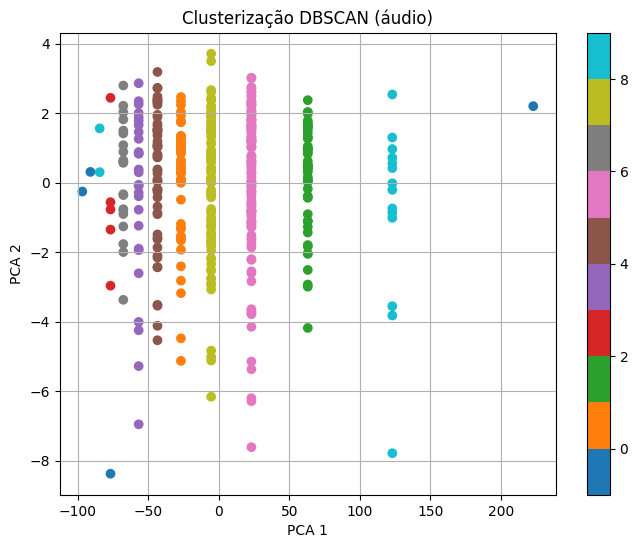

In [3]:
from pyAudioAnalysis import MidTermFeatures as mtf
from pyAudioAnalysis import ShortTermFeatures as stf
from pyAudioAnalysis import audioBasicIO
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import os

# Caminho com arquivos WAV
input_dir = "./all_wav"

# Parâmetros
mt_win = 2.0
mt_step = 1.0
st_win = 0.05
st_step = 0.05

# Listar arquivos
wav_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.wav')]

# Extração das características
features, _, filenames = mtf.directory_feature_extraction(input_dir, mt_win, mt_step, st_win, st_step)

# Clusterização DBSCAN
dbscan = DBSCAN(eps=5.0, min_samples=2).fit(features)
labels = dbscan.labels_

# Visualização (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

plt.figure(figsize=(8,6))
scatter = plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10')
plt.title("Clusterização DBSCAN (áudio)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter)
plt.grid(True)
plt.show()


In [10]:
!pip install umap-learn




   ---------------------------------------- 0/2 [pynndescent]
   ---------------------------------------- 0/2 [pynndescent]
   ---------------------------------------- 0/2 [pynndescent]
   -------------------- ------------------- 1/2 [umap-learn]
   -------------------- ------------------- 1/2 [umap-learn]
   -------------------- ------------------- 1/2 [umap-learn]
   ---------------------------------------- 2/2 [umap-learn]



D:\Fausto Stangler\Documentos\Python\BFX\.venv\Lib\site-packages\pyAudioAnalysis\..\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Fausto Stangler\Documentos\Python\BFX\.venv\Lib\site-packages\pyAudioAnalysis\..\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Fausto Stangler\Documentos\Python\BFX\.venv\Lib\site-packages\pyAudioAnalysis\..\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


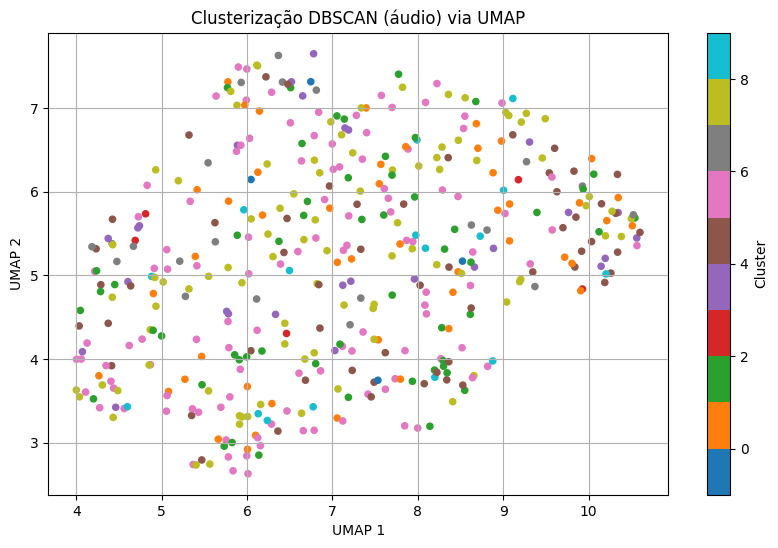

In [11]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Pré-processamento das features
X_scaled = StandardScaler().fit_transform(features)

# UMAP dimensionalidade reduzida para 2D
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = umap_reducer.fit_transform(X_scaled)

# Visualização
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=20)
plt.title("Clusterização DBSCAN (áudio) via UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()



In [61]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

def testar_dbscan(embedding, eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(embedding)

    plt.figure(figsize=(8, 5))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=20)
    plt.title(f"DBSCAN com eps={eps}, min_samples={min_samples}")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.grid(True)
    plt.show()

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = list(labels).count(-1)
    print(f"Clusters encontrados: {n_clusters} | Outliers: {n_outliers}")


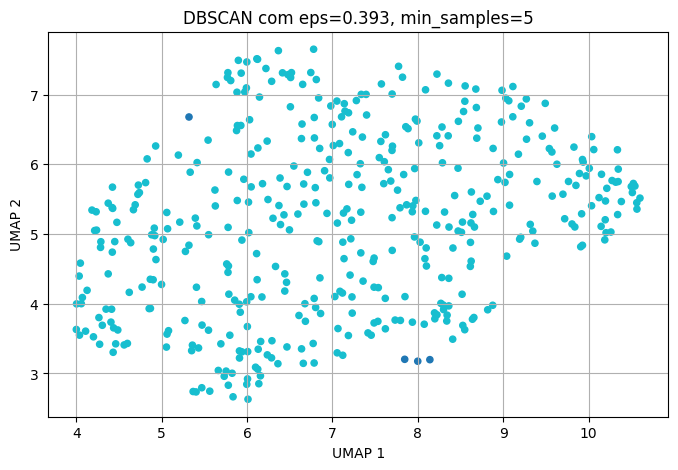

Clusters encontrados: 1 | Outliers: 4


In [62]:
testar_dbscan(embedding, eps=0.393, min_samples=5)


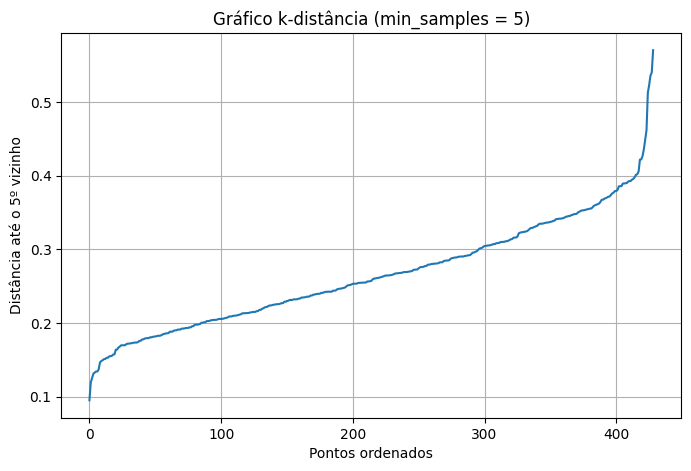

In [52]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def plot_k_distance(embedding, min_samples=5):
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(embedding)
    distances, indices = nbrs.kneighbors(embedding)

    # Distância até o k-ésimo vizinho (posição -1)
    k_distances = np.sort(distances[:, -1])

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances)
    plt.title(f"Gráfico k-distância (min_samples = {min_samples})")
    plt.xlabel("Pontos ordenados")
    plt.ylabel(f"Distância até o {min_samples}º vizinho")
    plt.grid(True)
    plt.show()
plot_k_distance(embedding, min_samples=5)


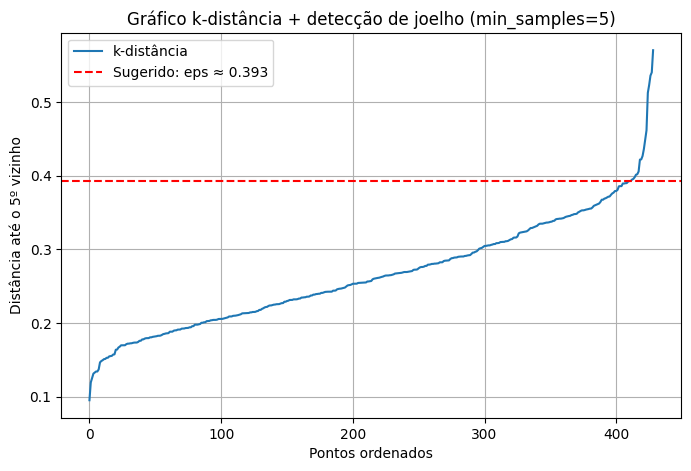

✓ eps sugerido pelo KneeLocator: 0.3929


In [57]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt

def detectar_eps_por_knee(embedding, min_samples=5):
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(embedding)
    distances, _ = nbrs.kneighbors(embedding)

    k_distances = np.sort(distances[:, -1])
    x = np.arange(1, len(k_distances) + 1)

    # Localiza o “joelho”
    kneedle = KneeLocator(x, k_distances, S=1.0, curve="convex", direction="increasing")
    eps_sugerido = kneedle.knee_y

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(k_distances, label="k-distância")
    if eps_sugerido:
        plt.axhline(y=eps_sugerido, color='r', linestyle='--', label=f"Sugerido: eps ≈ {eps_sugerido:.3f}")
    plt.title(f"Gráfico k-distância + detecção de joelho (min_samples={min_samples})")
    plt.xlabel("Pontos ordenados")
    plt.ylabel(f"Distância até o {min_samples}º vizinho")
    plt.legend()
    plt.grid(True)
    plt.show()

    if eps_sugerido:
        print(f"✓ eps sugerido pelo KneeLocator: {eps_sugerido:.4f}")
    else:
        print("⚠️ Não foi possível detectar o joelho automaticamente.")
    
    return eps_sugerido
eps = detectar_eps_por_knee(embedding, min_samples=5)


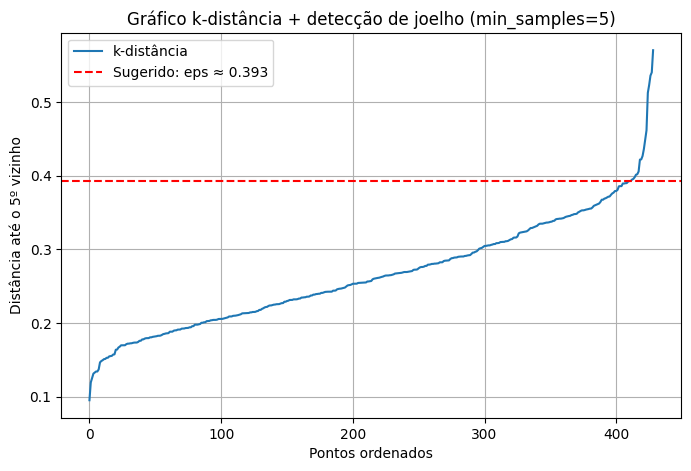

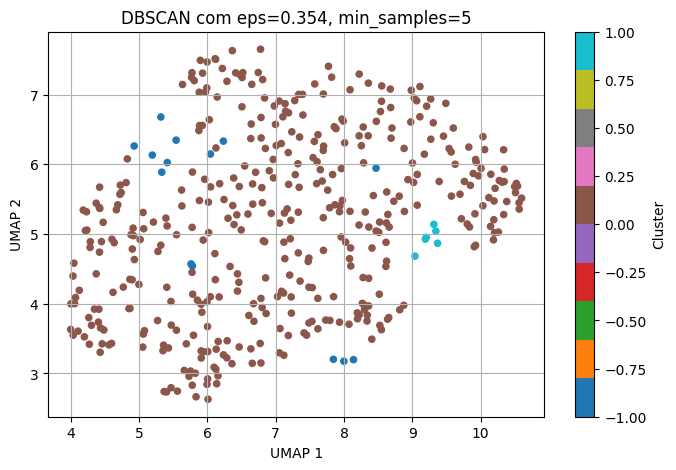

Clusters: 2 | Outliers: 14 (eps × 0.9)


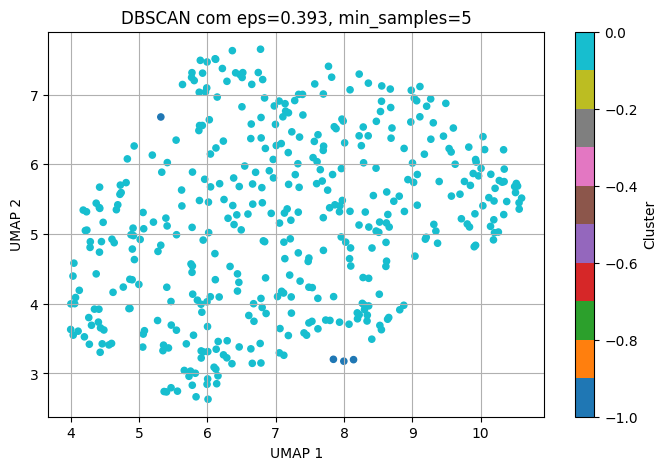

Clusters: 1 | Outliers: 4 (eps × 1.0)


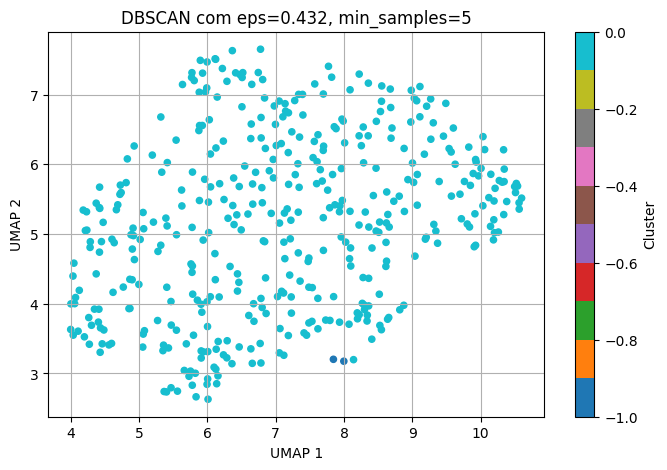

Clusters: 1 | Outliers: 2 (eps × 1.1)


In [63]:
# Célula que detecta o eps ideal com knee detection e testa DBSCAN com 3 variações

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

def detectar_eps_por_knee(embedding, min_samples=5):
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(embedding)
    distances, _ = nbrs.kneighbors(embedding)
    k_distances = np.sort(distances[:, -1])
    x = np.arange(1, len(k_distances) + 1)

    kneedle = KneeLocator(x, k_distances, S=1.0, curve="convex", direction="increasing")
    eps_sugerido = kneedle.knee_y

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances, label="k-distância")
    if eps_sugerido:
        plt.axhline(y=eps_sugerido, color='r', linestyle='--', label=f"Sugerido: eps ≈ {eps_sugerido:.3f}")
    plt.title(f"Gráfico k-distância + detecção de joelho (min_samples={min_samples})")
    plt.xlabel("Pontos ordenados")
    plt.ylabel(f"Distância até o {min_samples}º vizinho")
    plt.legend()
    plt.grid(True)
    plt.show()

    return eps_sugerido

def testar_dbscan_eps(embedding, min_samples=5):
    eps_base = detectar_eps_por_knee(embedding, min_samples)
    if eps_base is None:
        print("Não foi possível determinar eps automaticamente.")
        return

    for fator in [0.9, 1.0, 1.1]:
        eps = eps_base * fator
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(embedding)

        plt.figure(figsize=(8, 5))
        scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=20)
        plt.title(f"DBSCAN com eps={eps:.3f}, min_samples={min_samples}")
        plt.xlabel("UMAP 1")
        plt.ylabel("UMAP 2")
        plt.grid(True)
        plt.colorbar(scatter, label="Cluster")
        plt.show()

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_outliers = list(labels).count(-1)
        print(f"Clusters: {n_clusters} | Outliers: {n_outliers} (eps × {fator:.1f})")

testar_dbscan_eps(embedding, min_samples=5)



### AI Classification

Encontrados 349 arquivos.


D:\Fausto Stangler\Documentos\Python\BFX\.venv\Lib\site-packages\pyAudioAnalysis\..\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\Fausto Stangler\Documentos\Python\BFX\.venv\Lib\site-packages\pyAudioAnalysis\..\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


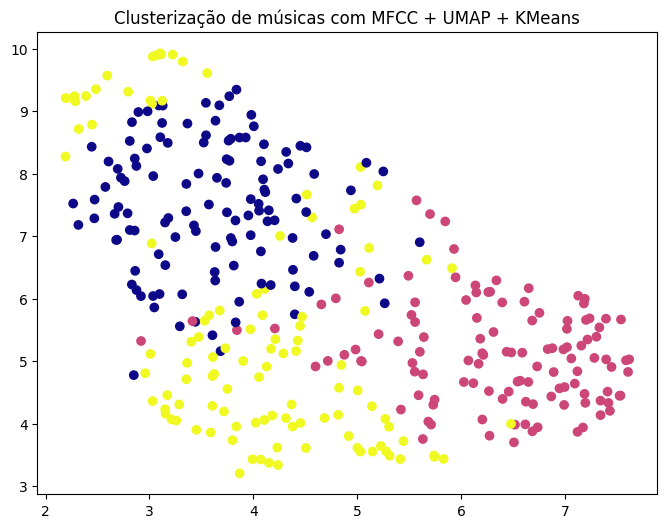

In [67]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Caminho com arquivos WAV
input_dir = r"D:\Fausto Stangler\Documentos\Python\BFX\music swing"
wav_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(input_dir)
             for f in filenames if f.lower().endswith('.wav')]

print(f"Encontrados {len(wav_files)} arquivos.")

# Passo 1 — extrair MFCC médio por faixa
def extract_features(wav_path):
    y, sr = librosa.load(wav_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = mfcc.mean(axis=1)
    return mfcc_mean

# Extrair todos
X = np.array([extract_features(p) for p in wav_files])

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clusterização com KMeans (ou DBSCAN etc)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

import umap
import matplotlib.pyplot as plt

# Usando o mesmo X_scaled do exemplo anterior
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='plasma')
plt.title("Clusterização de músicas com MFCC + UMAP + KMeans")
plt.show()




### Downloads

In [ ]:
import yt_dlp
from urllib.parse import urlparse, parse_qs, urlencode, urlunparse
from collections import OrderedDict
import os
import time
import glob
import re
import librosa
import subprocess


# 2) Faixas de target: (limite_inferior, limite_superior, target_bpm)
BPM_RANGES = [
    (100, 125, 120),
    (125, 145, 140),
    (145, 165, 160),
    (165, 185, 180),
]

playlists = [
    "https://www.youtube.com/watch?v=ELfzGV2Sa9w&list=PLJqUrQ44zEzVIX0spX2rICuTOZPwKUzyf", 
    "https://www.youtube.com/watch?v=8muSkr1uJ00&list=PLJBUoC0dxcUwz0CyvP3uUHXB5LHANe-HG", 
    "https://www.youtube.com/watch?v=FTQbiNvZqaY&list=RD1vrEljMfXYo&start_radio=1", 
    "https://www.youtube.com/watch?v=FTQbiNvZqaY&playlist=RD1vrEljMfXYo&start_radio=1", 
    "https://www.youtube.com/watch?v=1vrEljMfXYo&list=RD1vrEljMfXYo&start_radio=1&rv=1vrEljMfXYo", 
    "https://www.youtube.com/watch?v=l0q7MLPo-u8&list=RDl0q7MLPo-u8&start_radio=1&rv=NAEppFUWLfc", 
]

# Configurações gerais
OUTPUT_DIR = r"D:\Fausto Stangler\Videos\TubeDigger"

os.makedirs(OUTPUT_DIR, exist_ok=True)
# # DIR_SUP = os.path.join(OUTPUT_DIR, f"{bpm_sup}")
# # DIR_INF = os.path.join(OUTPUT_DIR, f"{bpm_inf}")
# # os.makedirs(DIR_SUP, exist_ok=True)
# # os.makedirs(DIR_INF, exist_ok=True)
# DIR_SUP = OUTPUT_DIR
# DIR_INF = OUTPUT_DIR

class QuietLogger:
    def debug(self, *args, **kwargs): pass
    def warning(self, *args, **kwargs): pass
    def error(self, *args, **kwargs): pass

def safe_filename(name):
    name = name.replace(" ", "_")
    return re.sub(r'[^A-Za-z0-9_-]', "", name)[:128]

def cleanup_conflicts(base):
    for ext in ('webm','m4a','mp3','mp4'):
        path = os.path.join(OUTPUT_DIR, f"{base}.{ext}")
        if os.path.exists(path):
            try: os.remove(path)
            except: pass

def wait_for_file(path, timeout=60):
    start = time.time()
    while not os.path.exists(path):
        if time.time() - start > timeout:
            return False
        time.sleep(0.5)
    return True

def get_playlist_links(input_url):
    # 1) Sanitize mix URLs: keep only v & list params
    p       = urlparse(input_url)
    qs      = parse_qs(p.query)
    v       = qs.get('v', [None])[0]
    list_id = qs.get('list', [None])[0]

    if v and list_id and list_id.startswith('RD'):
        # rebuild as: https://www.youtube.com/watch?v=<v>&list=<RD...>
        new_qs = urlencode({'v': v, 'list': list_id})
        url = urlunparse((p.scheme, p.netloc, p.path, '', new_qs, ''))
    else:
        url = input_url

    # 2) Let yt-dlp handle both standard & mix playlists
    ydl_opts = {
        'quiet': True,
        'extract_flat': True,         # just URLs, no metadata download
        'force_generic_extractor': False,
        'yes_playlist': True,         # API equivalent of --yes-playlist
    }
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=False)

    # 3) Normalize to full watch-URLs and de-dupe
    entries = info.get('entries') or []
    links = []
    for e in entries:
        vid = e.get('url') or e.get('id')
        if not vid:
            continue
        if not vid.startswith('http'):
            vid = f"https://www.youtube.com/watch?v={vid}"
        links.append(vid)

    return list(OrderedDict.fromkeys(links))

def get_playlist_links_old(playlist_url):
    opts = {
        'quiet': True,
        'extract_flat': True,
        'force_generic_extractor': False,
    }
    with yt_dlp.YoutubeDL(opts) as ydl:
        info = ydl.extract_info(playlist_url, download=False)
        return [e['url'] for e in info.get('entries', []) if 'url' in e]

def download_to_wav(url, safe_title):
    wav_path = os.path.join(OUTPUT_DIR, f"{safe_title}.wav")
    if os.path.exists(wav_path):
        return wav_path

    cleanup_conflicts(safe_title)
    print(f"[{time.strftime('%H:%M:%S')}] iniciando download: {safe_title}")

    opts = {
        'format': 'bestaudio[abr<=128]',
        'outtmpl': os.path.join(OUTPUT_DIR, f"{safe_title}.%(ext)s"),
        'nopart': True,
        'continuedl': False,
        'quiet': True,
        'no_warnings': True,
        'restrictfilenames': True,
        'socket_timeout': 30,
        'retries': 3,
        'no_progress': True,
        'logger': QuietLogger(),
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192',
        }],
    }

    with yt_dlp.YoutubeDL(opts) as ydl:
        ydl.download([url])

    if not wait_for_file(wav_path, timeout=60):
        raise TimeoutError(f"{wav_path} não apareceu em 60s")

    print(f"[{time.strftime('%H:%M:%S')}] WAV pronto: '{wav_path}'")
    return wav_path

def extract_bpm_librosa(wav_path):
    y, sr = librosa.load(wav_path, sr=None)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    bpm = float(tempo if isinstance(tempo, (int, float)) else tempo[0])
    return round(bpm*2 if bpm < 100 else bpm, 2)

def compute_multiplier(original_bpm, target_bpm):
    return round(target_bpm / original_bpm, 3)

def normalize_bpm(bpm: float) -> float:
    """
    Ajusta BPM bruto:
     - Se < 100, dobra.
     - Se > 185, divide por 2.
     - Caso contrário, retorna inalterado.
    """
    if bpm < 100:
        return bpm * 2
    if bpm > 185:
        return bpm / 2
    return bpm

def choose_target(bpm: float) -> int:
    """
    Escolhe o target conforme as faixas definidas em BPM_RANGES.
    Lança ValueError se BPM não cair em nenhuma faixa.
    """
    for low, high, target in BPM_RANGES:
        if low <= bpm < high:
            return target
    raise ValueError(f"BPM fora do intervalo suportado: {bpm:.2f}")

def run_ffmpeg(wav_file, mult, out_mp3):
    cmd = [
        "ffmpeg", "-y",
        "-i", wav_file,
        "-filter:a", f"atempo={mult}",
        "-vn", out_mp3
    ]
    subprocess.run(cmd, check=True)
    return cmd

# # Obtém links da playlist
# query = parse_qs(urlparse(url).query)
# plist = query.get("list", [None])[0]
# playlist_url = f"https://www.youtube.com/playlist?list={plist}" if plist else url
# links = list(OrderedDict.fromkeys(get_playlist_links(playlist_url)))
# print(f"Total de vídeos na playlist: {len(links)}")

def get_mp3(links):
    # Processamento de cada link
    for idx, link in enumerate(links[:20], 1):
        print(idx, link)
        # 1) metadata + safe_title
        with yt_dlp.YoutubeDL({'quiet':True,'no_warnings':True,'restrictfilenames':True}) as ydl_meta:
            info = ydl_meta.extract_info(link, download=False)
        safe_title = safe_filename(info['title'])
        wav_path   = os.path.join(OUTPUT_DIR, f"{safe_title}.wav")

        # 2) download WAV (com tratamento de WinError)
        try:
            wav_path = download_to_wav(link, safe_title)
        except Exception as e:
            if os.path.exists(wav_path):
                print(f"[{time.strftime('%H:%M:%S')}] ⚠ Warn: download error mas .wav existe, prosseguindo: {e}")
            else:
                print(f"[{time.strftime('%H:%M:%S')}] ✗ Erro grave no download ({safe_title}): {e}")
                continue

        # 3) extrair e ajustar BPM
        try:
            bpm = extract_bpm_librosa(wav_path)
        except Exception as e:
            print(f"[{time.strftime('%H:%M:%S')}] ✗ Falha ao extrair BPM ({safe_title}): {e}")
            continue
        
        # escolhe target
        try:
            target = choose_target(bpm)
        except ValueError as ve:
            print(f"[{time.strftime('%H:%M:%S')}] ✗ {ve} em {safe_title}")
            continue

        # 5) pular se já existir
        out_dir = os.path.join(OUTPUT_DIR, str(target))
        os.makedirs(out_dir, exist_ok=True)
        out_mp3 = os.path.join(out_dir, f"{safe_title}_{target}bpm.mp3")
        if os.path.exists(out_mp3):
            # print(f"[{time.strftime('%H:%M:%S')}] • Já existe: {safe_title}_{target}bpm.mp3 — pulando")
            continue

        # 6) converter com FFmpeg
        try:
            mult = compute_multiplier(bpm, target)
            run_ffmpeg(wav_path, mult, out_mp3)
            print(f"[{time.strftime('%H:%M:%S')}] ✓ {target} {idx}. {safe_title}: {bpm:.2f}→{target}bpm ({mult:.2f}x)")
        except Exception as e:
            print(f"[{time.strftime('%H:%M:%S')}] ✗ FFmpeg falhou em {safe_title} para {target}bpm: {e}")
            continue


for url in playlists:
    print(url)
    links = get_playlist_links(url)
    print(f"Total de vídeos: {len(links)}→20")
    get_mp3(links)

print('done!')